**What is ggplot in Python?**  
  
ggplot is a data visualization package that helps you make informative plots in Python.  
It is inspired by the ggplot2 library in R, which follows the "Grammar of Graphics" principle.  
This principle means you build plots by combining different components, like data, scales, and layers, much like how you construct a sentence in grammar.  

**What is "Grammar of Graphics" principle?**  

The Grammar of Graphics is a framework for data visualization, conceptualized by Leland Wilkinson, that provides a structured approach to creating statistical graphics.  
The idea is to break down a graph into semantic components such as data, scales, and geometric objects, allowing for a systematic construction of plots. This principle is what ggplot2 in R and plotnine (a Python implementation of ggplot) are based on.    
  
**Key Features of ggplot:**  
  
Grammar of Graphics: You build plots by adding layers, such as points, lines, and bars, with a consistent and coherent structure.  
High-level interface: You specify what kind of plot you want, and ggplot takes care of the details.  

**How ggplot is different from seaborn and matplotlib?**  

**ggplot** is great for those who prefer the Grammar of Graphics approach and want to build plots layer by layer.  
**Matplotlib** offers the most control and flexibility but requires more effort.  
**Seaborn** simplifies statistical plotting, making it quicker and easier to create attractive plots.  

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


#for ggplot we will install plotnine
#!pip install plotnine

#importing libraries for ggplot
from plotnine import ggplot, aes, geom_point, geom_bar, theme, geom_text, facet_grid, labs, geom_violin

**These are fundamental parts of creating a plot with plotnine, a Python library for data visualization based on the Grammar of Graphics.**  
  
**ggplot**  
Purpose: It is the main function that initializes a plot.  
Usage: You create a plot object with ggplot(data), where data is your data frame.  
  
**aes**  
Purpose: It stands for "aesthetic mappings" and defines how data variables are mapped to visual properties (aesthetics) of the plot, like x and y axes, color, size, shape, etc.  
Usage: You define it within ggplot or any geom function like geom_bar, using aes(x='category', y='value').  
  
**geom_bar**    
Purpose: It adds a bar plot layer to the plot.  
Usage: geom_bar(stat='identity') creates bars with heights corresponding to the data values directly. Without stat='identity', it defaults to counting the occurrences of each category.  
  
**geom_text**  
Purpose: It adds text annotations to the plot.  
Usage: geom_text(aes(label='value'), va='bottom') adds labels to the bars, where label='value' specifies which data variable to use for the labels.  
  
**theme**  
Purpose: It customizes the appearance of the plot, such as figure size, background, grid lines, text properties, etc.  
Usage: theme(figure_size=(10, 5)) sets the dimensions of the plot.  

**geom_point**  
Purpose: To create scatter plots by plotting individual data points.  
Usage: ggplot(data) + geom_point(aes(x = variable1, y = variable2))  
  
**facet_grid**  
Purpose: To create multiple plots based on categorical variables, arranged in a grid.  
Usage: ggplot(data) + geom_point(aes(x = variable1, y = variable2)) + facet_grid(rows ~ columns)  

**labs**  
Purpose: To add and customize labels like titles, axis labels, and captions.  
Usage: ggplot(data) + geom_point(aes(x = variable1, y = variable2)) + labs(title = "Title", x = "X Axis", y = "Y Axis")  
  
**geom_violin**  
Purpose: To create violin plots showing the distribution of a numerical variable.  
Usage: ggplot(data) + geom_violin(aes(x = factor_variable, y = numerical_variable))  

In [2]:
#reading data into a dataframe

df = pd.read_csv(r'C:\Users\shiva\OneDrive\Desktop\Abhishek Tiwari\SGC\Day 1 EDA\Group 3 - Sleep Disorder Analysis-20240625T051639Z-001\Group 3 - Sleep Disorder Analysis\Sleep_disorder_data.csv', header = 0)

In [3]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
df.fillna('NoSleepDisorder', inplace=True)

In [5]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [6]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
NoSleepDisorder    219
Sleep Apnea         78
Insomnia            77
Name: count, dtype: int64

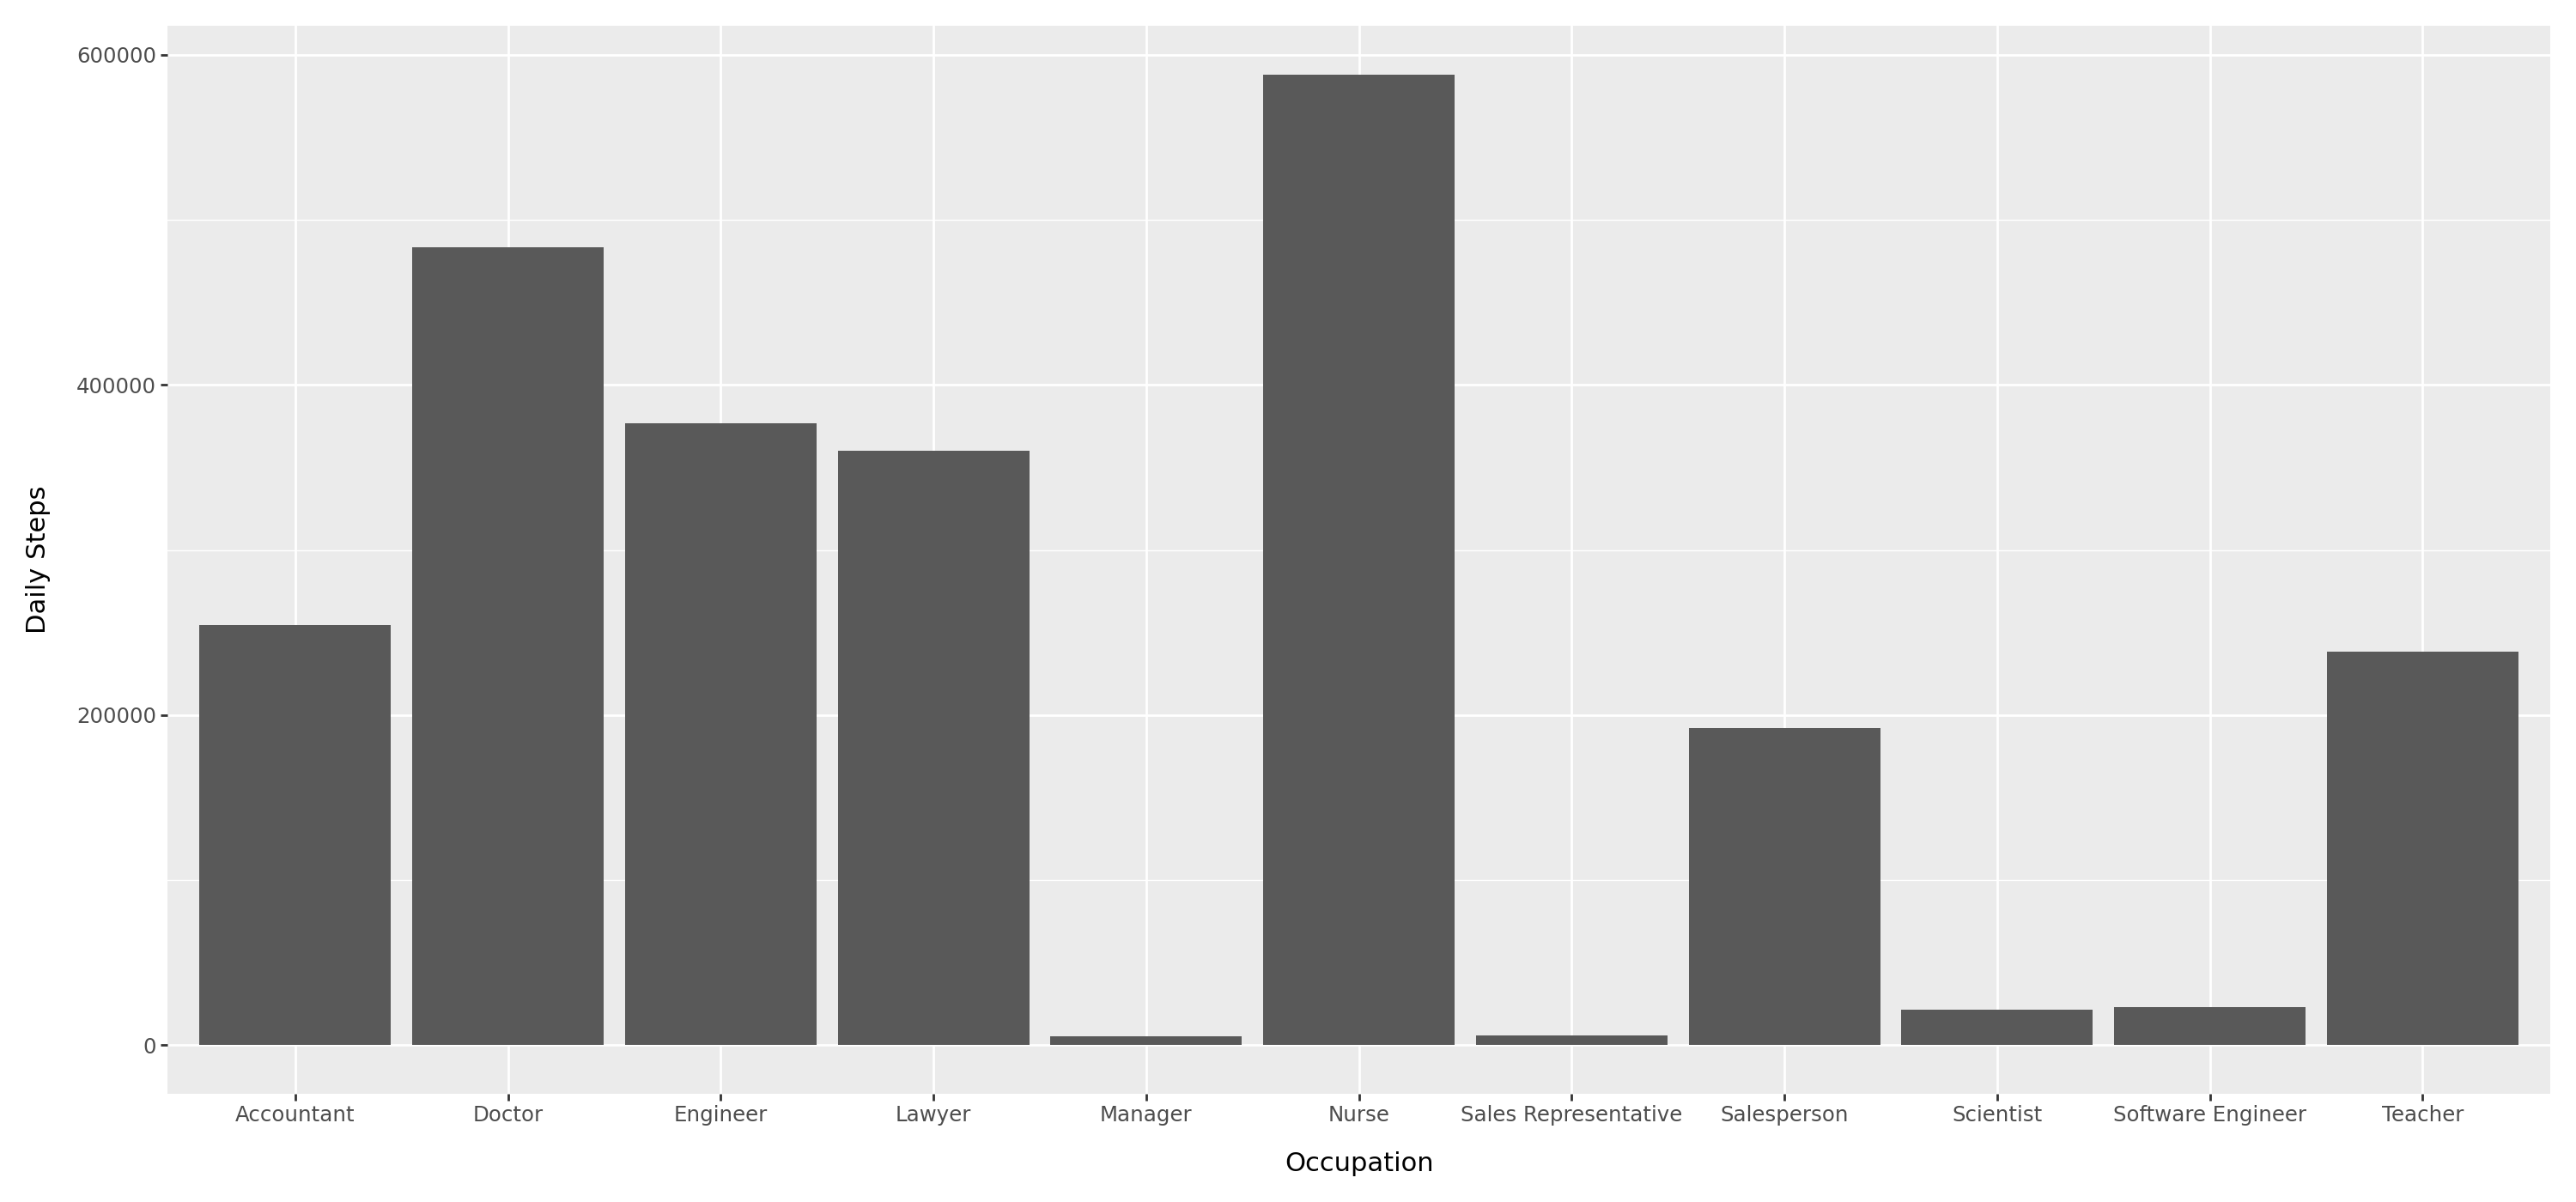

In [7]:
plot = (ggplot(df) +
        aes(x='Occupation', y='Daily Steps') +
        geom_bar(stat='identity')+
        theme(figure_size=(15, 7)))

# Display the plot
print(plot)

**What is this graph showing?**  
  
This is a bar chart that shows the total number of daily steps for different occupations.  

**What do the bars represent?**  
  
Each bar represents the total daily steps for a specific occupation.  
Taller bars mean more daily steps and shorter bars mean fewer daily steps.  
  
**What can we see from this graph?** 
  
Nurses have the highest total daily steps, with a very tall bar.  
Managers and Software Engineers have the lowest total daily steps, with very short bars.  
Other occupations like Engineers, Doctors, and Teachers have varying numbers of daily steps, but none are as high as Nurses.  

In [8]:
df['BMI Category'].replace({'Obese': 'Obese/Overweight', 'Overweight': 'Obese/Overweight', 'Normal Weight': 'Underweight'}, inplace=True)

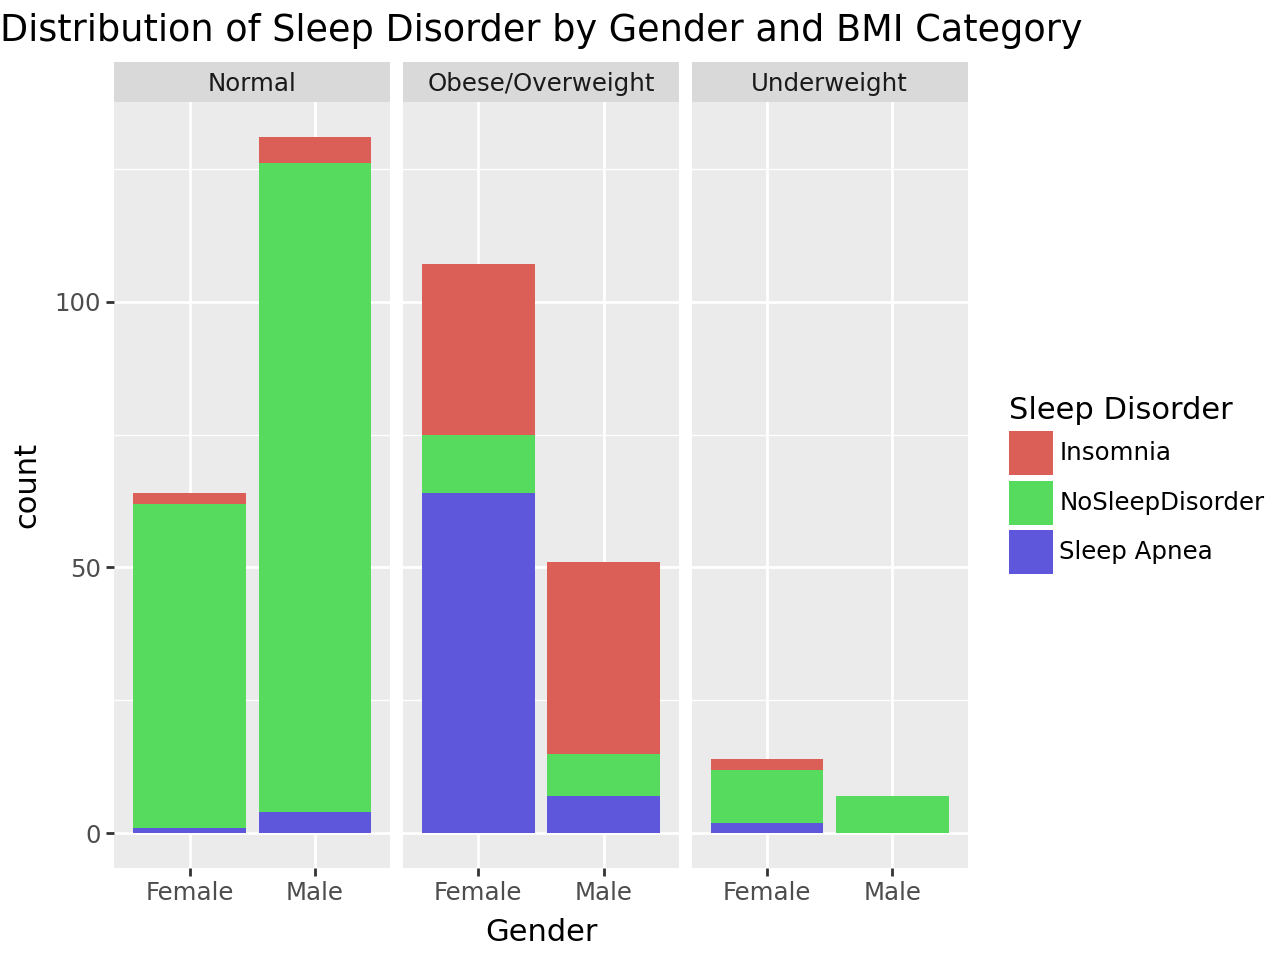

In [9]:
(
    ggplot(df, aes(x='Gender', fill='Sleep Disorder')) +
    geom_bar() +
    facet_grid('~ BMI Category') +
    labs(title='Distribution of Sleep Disorder by Gender and BMI Category')
)

**What is this graph showing?**  
  
This is a bar chart showing the distribution of different sleep disorders by gender and BMI category.  

**What do the bars represent?**  
  
The height of each colored segment in the bars represents the count of people with that specific sleep disorder within each gender and BMI category.  
  
**What can we see from this graph?**  
  
In the Normal BMI category, males without sleep disorders (green) have the highest count, followed by females.  
In the Normal Weight BMI category, both genders have low counts with no sleep disorders (green) being the highest.  
In the Obese BMI category, the counts are very low for both genders.  
In the Overweight BMI category, males with sleep apnea (blue) have the highest count, followed by females with insomnia (red) and no sleep disorders (green).  

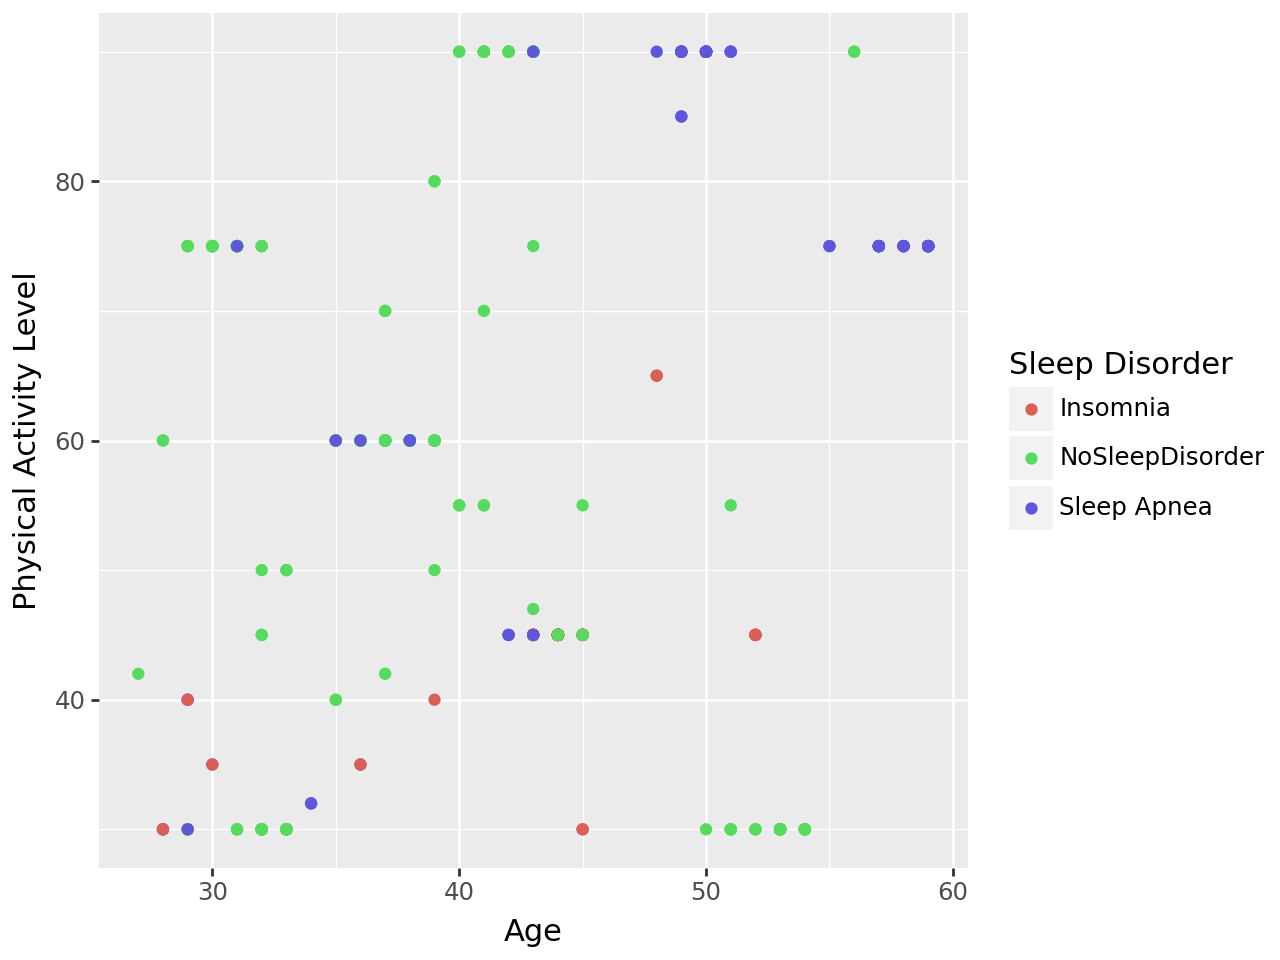

In [10]:
ggplot(df, aes(x='Age', y='Physical Activity Level', color = 'Sleep Disorder')) + geom_point()

**What is this graph showing?**  
  
This is a scatter plot that shows the relationship between age and physical activity level for people with different sleep disorders.  

**What do the dots represent?**  
  
Each dot represents one individual.  
The position of the dot shows the person's age and physical activity level.  
The color of the dot indicates the type of sleep disorder the person has.  
  
**What can we see from this graph?**  
  
People with No Sleep Disorder (green dots) are spread across all ages and physical activity levels.  
People with Sleep Apnea (blue dots) are mostly found at higher physical activity levels.  
People with Insomnia (red dots) are fewer and scattered across different ages and activity levels.  

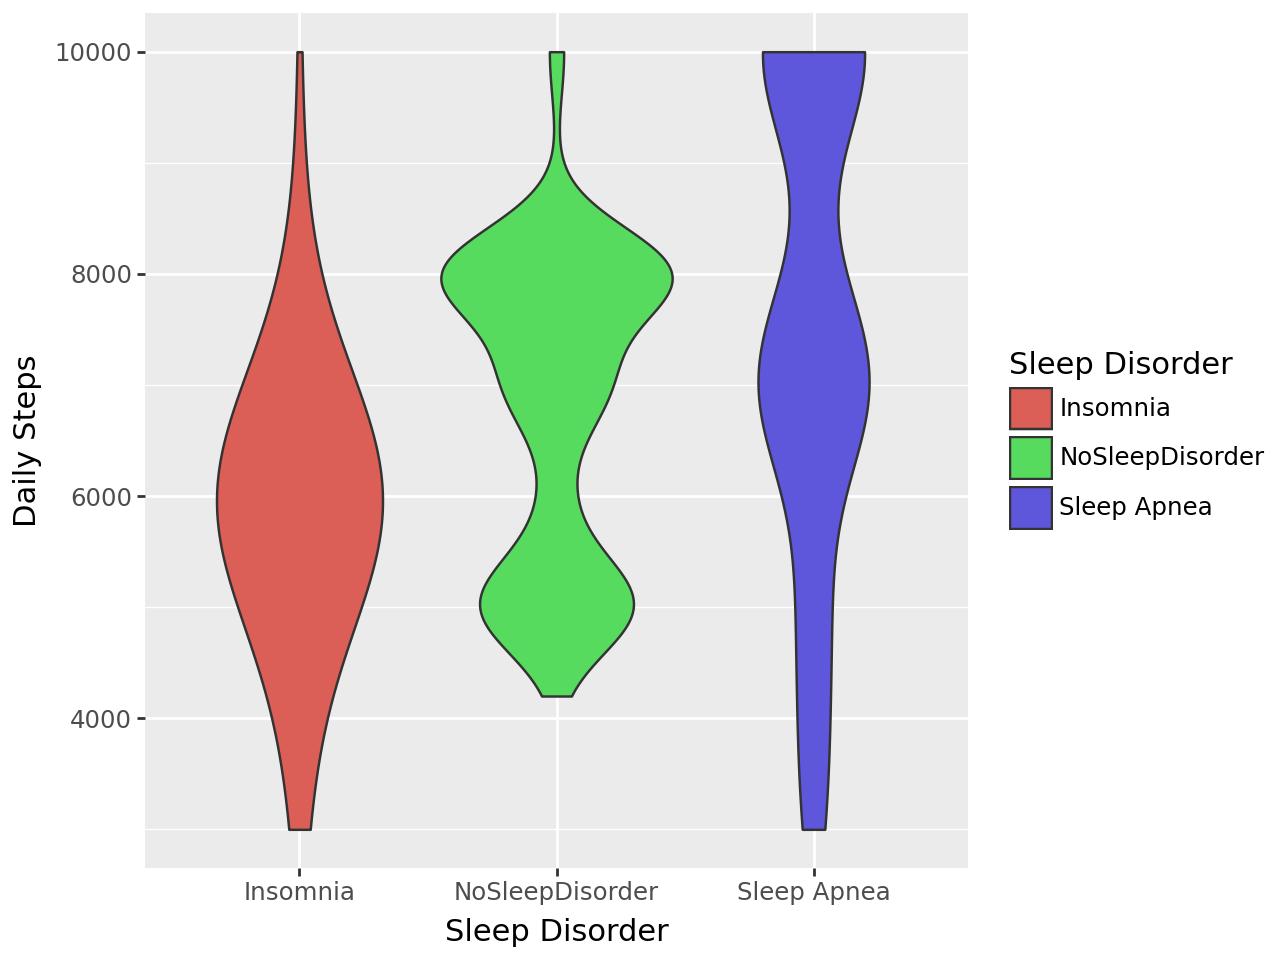

In [11]:
ggplot(df, aes(x='Sleep Disorder', y='Daily Steps', fill='Sleep Disorder')) + geom_violin()

**What is this graph showing?**  
  
This is a "violin plot" that shows the distribution of daily steps for people with different sleep disorders.  


**What is the shape showing?**  

The shape of each coloured area shows the distribution of daily steps for that group.  
Wider parts mean more people are in that range of daily steps.  
Narrow parts mean fewer people are in that range of daily steps.  

  
**What can we see from this graph?**  

People with Insomnia (red) seem to have a wide range of daily steps but fewer high step counts.  
People without any sleep disorder (green) have a more balanced distribution with many people around 8000 steps.  
People with Sleep Apnea (blue) also have a wide range, but they tend to have fewer low step counts compared to people with Insomnia.